# Formula One: Predicting The World Champions Of Tomorrow
### Anthony Chen, Ayush Saldhi and Taylor Oglow


# Introduction

Formula 1 represents the highest class of professional open-wheeled single-seater motorsport, popularly known as formula racing. With unparalleled intensity and competitiveness, a Formula 1 World Championship consists of a series of globe-trotting races held on circuits. Ten teams, each consisting of two starting drivers, responsible for developing and maintaining their cars compete to cross the finish line first after completing several predetermined laps.  Points are awarded to the first ten finishers in each race and are accumulated throughout the season. Ultimately, the driver and the team that have accumulated the most points are crowned with the Drivers’ and Constructors’ World Championship.

Over the past decade, only two teams and four drivers have been successful in their pursuit of the world championship. In a sport that thrives on data, this raises concerns regarding the ability to predict the results of a championship. Knowing this, our team sets out to try and answer the following question:


**Question**: 
<br> 
*What will the standing for each driver and constructor be in the upcoming 2022 Formula 1 World Championship?*

In this journey of predicting standings, we will be utilizing the dataset “Formula 1 World Championship (1950-2021)” created by the Kaggle user Vopani via http://ergast.com/mrd/ which can be found at https://www.kaggle.com/rohanrao/formula-1-world-championship-1950-2020. The data set consists of 14 files each containing data pertaining to a specific aspect of the sport such as drivers, constructors, circuits, races etc. A breakdown of the dataset can be found below: 

**Formula 1 World Championship (1950 - 2022)**

Files: 
1. circuits.csv
2. constructor_results.csv
3. constructor_standings.csv
4. constructors.csv
5. driver_standings.csv
6. drivers.csv
7. lap_times.csv
8. pit_stops.csv
9. qualifying.csv
10. races.csv
11. results.csv
12. seasons.csv
13. sprint_results.csv
14. status.csv


# Methods

Having a metric by which we can assess the driver performance across the championship is central to the process of being able to predict the standings for drivers and their respective constructors.  In a sport as complex as Formula 1, there are multiple metrics by which a driver's performance can be assessed. Some of which include lap times, pit stops, qualification, etc. Ultimately, to be victorious in a Grand Prix, a driver must prove that they are the fastest to cross the checkered flag out of all other drivers.

Quite simply, race time is at the heart of determining victory in a race and assessing the performance of drivers across all races. As such, to achieve the end goal of predicting standings for all drivers and constructors, we will be utilizing **lap times** as the metric of performance in our data analysis. The data analysis that we conducted is divided into four phases in our report: 

1. Loading Data

2. Data Wrangling

3. Exploratory Data Analysis

4. Predictive Data Analysis

## Phase 1: Loading Data

To commence the data analysis, we begin by loading all required libraries:

In [485]:
library (tidyverse)
library (tidymodels)
library(cowplot)
library(RColorBrewer)

We start by reading the Formula 1 World Championship data set from Kaggle. For simplicity, the entire data set has been downloaded from Kaggle, and added to our group project remote repository, named Formula_1 on GitHub. The repository can be found at https://github.com/TaylorOglow/Formula_1:

In [486]:
# Reading entire data set from GitHub

circuits <- read_csv("https://raw.githubusercontent.com/TaylorOglow/group_project_proposal/main/data_set/circuits.csv")

constructor_results <- read_csv("https://raw.githubusercontent.com/TaylorOglow/group_project_proposal/main/data_set/constructor_results.csv")

constructor_standings <- read_csv("https://raw.githubusercontent.com/TaylorOglow/group_project_proposal/main/data_set/constructor_standings.csv")

constructors <- read_csv("https://raw.githubusercontent.com/TaylorOglow/group_project_proposal/main/data_set/constructors.csv")

driver_standings <- read_csv("https://raw.githubusercontent.com/TaylorOglow/group_project_proposal/main/data_set/driver_standings.csv")

drivers <- read_csv("https://raw.githubusercontent.com/TaylorOglow/group_project_proposal/main/data_set/drivers.csv")

lap_times <- read_csv("https://raw.githubusercontent.com/TaylorOglow/group_project_proposal/main/data_set/lap_times.csv") 

pit_stops <- read_csv("https://raw.githubusercontent.com/TaylorOglow/group_project_proposal/main/data_set/pit_stops.csv")
           
qualifying <- read_csv("https://raw.githubusercontent.com/TaylorOglow/group_project_proposal/main/data_set/qualifying.csv") 

races <- read_csv("https://raw.githubusercontent.com/TaylorOglow/group_project_proposal/main/data_set/races.csv") 

results <- read_csv("https://raw.githubusercontent.com/TaylorOglow/group_project_proposal/main/data_set/results.csv") 

status <- read_csv("https://raw.githubusercontent.com/TaylorOglow/group_project_proposal/main/data_set/status.csv") 

Rows: 79 Columns: 9

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): circuitRef, name, location, country, alt, url
dbl (3): circuitId, lat, lng


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 11950 Columns: 5

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): status
dbl (4): constructorResultsId, raceId, constructorId, points


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 12716 Columns: 7

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): positionText
dbl (6): constructorStandingsId, raceId, constructorId, points, position, wins


ℹ Use `spec()` to retrieve the full column specification for this

## Phase 2: Data Wrangling

Having loaded all data, we now shift gears to data wrangling. It is vital to any data analysis, that all data being used be tidy. 

Before commencing the process of predicting the standings of all 20 drivers and their respective teams in the upcoming 2022 Formula 1 World Championship, it is crucial to wrangle the data keeping in mind the scope of this project. 

We start by printing only the files that mirror the scope of our analysis to ensure that they are tidy, and then wrangling them to extract specific data that will be useful later on in our data analysis:

### 2.1 - Circuits

We first print out the first few rows of `circuits` below to ensure that it is tidy:

In [487]:
head(circuits)

circuitId,circuitRef,name,location,country,lat,lng,alt,url
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_Prix_Circuit
2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_International_Circuit
3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_International_Circuit
4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcelona-Catalunya
5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
6,monaco,Circuit de Monaco,Monte-Carlo,Monaco,43.73470,7.42056,7,http://en.wikipedia.org/wiki/Circuit_de_Monaco


A Formula 1 world championship consists of a number races that take place across the globe. In the upcoming season, there are exactly 22 races that are scheduled to take place.

By cross-referencing the official Formula 1 Schedule, which can be found at https://www.formula1.com/en/racing/2022.html, with the variable `location` in `circuits`, we create a vector of all the locations at which races are scheduled. Consequently, we filter `circuits` using that vector, also filtering out any extra observations creating the following tibble printed below. 

> Note: `circuits_2022` contains observations of 24 circuits although only 22 races are scheduled. The presence of circuits in Portimão and Istanbul will be explained later.

In [488]:
# Vector of 2022 GP locations

locations_2022 <- c("Sakhir", "Portimão", "Melbourne", "Imola", "Miami", "Montmeló", "Monte-Carlo", "Baku", "Montreal", "Silverstone", "Spielberg", "Jeddah", 
                "Le Castellet", "Budapest", "Spa", "Zandvoort", "Monza", "Marina Bay", "Suzuka", "Austin", "Mexico City", "São Paulo", "Abu Dhabi", "Istanbul")

# Filtering circuit data set by locations vector 

circuits_2022 <- circuits %>% 
                  filter(location %in% locations_2022) %>%
                  filter(name != "A1-Ring") %>%
                  select(circuitId:alt)

circuits_2022

circuitId,circuitRef,name,location,country,lat,lng,alt
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10
3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.0325,50.51060,7
4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.5700,2.26111,109
5,istanbul,Istanbul Park,Istanbul,Turkey,40.9517,29.40500,130
6,monaco,Circuit de Monaco,Monte-Carlo,Monaco,43.7347,7.42056,7
7,villeneuve,Circuit Gilles Villeneuve,Montreal,Canada,45.5000,-73.52280,13
9,silverstone,Silverstone Circuit,Silverstone,UK,52.0786,-1.01694,153
11,hungaroring,Hungaroring,Budapest,Hungary,47.5789,19.24860,264
13,spa,Circuit de Spa-Francorchamps,Spa,Belgium,50.4372,5.97139,401


Utilizing `circuits_2022`, we now pull the circuit ids, creating the vector `circuit_ids`. In addition, for ease of usage we also create a seperate tibble, `circuit_IDS` pertaining to the identity and location of the selected circuits. This data will be useful when wrangling data pertaining to races and lap times shown later: 

In [489]:
circuit_ids <- circuits_2022 %>%
                  pull(circuitId)

circuit_ids

circuits_IDS <- circuits_2022 %>%
                  select(circuitId, name, country, location) %>% 
                   arrange(country)

circuits_IDS

[1]  1  3  4  5  6  7  9 11 13 14 15 18 21 22 24 32 34 39 69 70 73 75 77 79

circuitId,name,country,location
<dbl>,<chr>,<chr>,<chr>
1,Albert Park Grand Prix Circuit,Australia,Melbourne
70,Red Bull Ring,Austria,Spielberg
73,Baku City Circuit,Azerbaijan,Baku
3,Bahrain International Circuit,Bahrain,Sakhir
13,Circuit de Spa-Francorchamps,Belgium,Spa
18,Autódromo José Carlos Pace,Brazil,São Paulo
7,Circuit Gilles Villeneuve,Canada,Montreal
34,Circuit Paul Ricard,France,Le Castellet
11,Hungaroring,Hungary,Budapest


### 2.2 - Constructors

We again print out the first few rows of `constructors` below to ensure that it is tidy:

In [490]:
head(constructors)

constructorId,constructorRef,name,nationality,url
<dbl>,<chr>,<chr>,<chr>,<chr>
1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Prix_Engineering
4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formula_One
5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
6,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari


Knowing that 10 teams currently compete in a season, we cross-reference the list of current teams, found at https://www.formula1.com/en/teams.html to the `name` variable in `constructors` tibble, creating a vector, `team_names`, using which we filter `constructors` as shown below.

In [491]:
# Filtering 2022 Constructors

team_names <- c("Alfa Romeo", "AlphaTauri", "Alpine F1 Team", "Aston Martin", "Ferrari", 
                    "Haas F1 Team", "McLaren", "Mercedes", "Red Bull", "Williams")

teams_2022 <- constructors %>%
                filter(name %in% team_names) %>%
                select(-url)

teams_2022

constructorId,constructorRef,name,nationality
<dbl>,<chr>,<chr>,<chr>
1,mclaren,McLaren,British
3,williams,Williams,British
6,ferrari,Ferrari,Italian
9,red_bull,Red Bull,Austrian
51,alfa,Alfa Romeo,Swiss
117,aston_martin,Aston Martin,British
131,mercedes,Mercedes,German
210,haas,Haas F1 Team,American
213,alphatauri,AlphaTauri,Italian


Additionally we also pull the `constructorId`, creating a vector `constructor_ids` which will be useful later in the data analysis.

In [492]:
 # Extracting 2022 Constructor ID's

constructor_ids <- teams_2022 %>%
                  pull(constructorId)

constructor_ids

[1]   1   3   6   9  51 117 131 210 213 214

### 2.3 - Drivers

We again print out the first few rows of `drivers` below to ensure that it is tidy:

In [493]:
head(drivers)

driverId,driverRef,number,code,forename,surname,dob,nationality,url
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<chr>
1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
6,nakajima,\N,NAK,Kazuki,Nakajima,1985-01-11,Japanese,http://en.wikipedia.org/wiki/Kazuki_Nakajima


Knowing that each team in a season consists of two drivers, we again cross-reference the list of current drivers, found at https://www.formula1.com/en/drivers.html to the `surname` variable in `drivers` tibble, creating a vector, `driver_surnames`, that allows us to filter `constructors`. We then apply an additional layer of filtering to remove any drivers that may share the same surname by filtering using `forname` as shown below:

> Note: `drivers_2022` contains 33 drivers although only 20 drivers are taking part in the upcoming season. The presence of these extra drivers will be explained later.

In [494]:
# Filtering 2022 Drivers

driver_surnames <- c("Hamilton", "Russell", "Albon", "Zhou", "Bottas", "Gasly", "Tsunoda", "Alonso", "Ocon", "Vettel", "Stroll", 
                     "Leclerc", "Sainz", "Magnussen", "Schumacher", "Ricciardo", "Norris", "Verstappen", "Pérez", "Latifi", "Grosjean", 
                      "Gutiérrez", "Mazepin", "Massa", "di Resta", "Sirotkin", "Aitken", "Kvyat", "Hartley", "Räikkönen", "Giovinazzi", 
                      "Kubica", "Vandoorne")

drivers_2022 <- drivers %>%
                filter(surname %in% driver_surnames) %>%
                filter(!(forename %in% c("Ralf", "Michael", "Jos", "Duncan", "Jan", "Gene")))

drivers_2022 

driverId,driverRef,number,code,forename,surname,dob,nationality,url
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<chr>
1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
8,raikkonen,7,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C3%B6nen
9,kubica,88,KUB,Robert,Kubica,1984-12-07,Polish,http://en.wikipedia.org/wiki/Robert_Kubica
13,massa,19,MAS,Felipe,Massa,1981-04-25,Brazilian,http://en.wikipedia.org/wiki/Felipe_Massa
20,vettel,5,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
154,grosjean,8,GRO,Romain,Grosjean,1986-04-17,French,http://en.wikipedia.org/wiki/Romain_Grosjean
842,gasly,10,GAS,Pierre,Gasly,1996-02-07,French,http://en.wikipedia.org/wiki/Pierre_Gasly
814,resta,\N,DIR,Paul,di Resta,1986-04-16,British,http://en.wikipedia.org/wiki/Paul_di_Resta


Likewise, we again pull the `driver_ids` as well as the `driver_codes` which will be useful later in the data analysis as you will see shortly. We also combine these two vectors into a tibble for ease of viewing:

In [495]:
# Extracting Driver IDS

driver_ids <- drivers_2022 %>%
              pull(driverId)

driver_ids

# Extracting Driver Codes

driver_codes <- drivers_2022 %>%
              pull(code)

driver_codes

# Combining IDS and Codes

driver_id_code <- data.frame(driver_ids, driver_codes)

driver_id_code

[1]   1   4   8   9  13  20 154 842 814 815 817 821 822 825 826 830 832 838 839
[20] 840 841 843 844 845 846 847 848 849 851 852 853 854 855

[1] "HAM" "ALO" "RAI" "KUB" "MAS" "VET" "GRO" "GAS" "DIR" "PER" "RIC" "GUT"
[13] "BOT" "MAG" "KVY" "VER" "SAI" "VAN" "OCO" "STR" "GIO" "HAR" "LEC" "SIR"
[25] "NOR" "RUS" "ALB" "LAT" "AIT" "TSU" "MAZ" "MSC" "ZHO"

driver_ids,driver_codes
<dbl>,<chr>
1,HAM
4,ALO
8,RAI
9,KUB
13,MAS
20,VET
154,GRO
842,GAS
814,DIR


### 2.4 - Races

By printing out the first few rows of `races` below, we ensure that it is tidy:

In [496]:
head(races)

raceId,year,round,circuitId,name,date,time,url
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<date>,<chr>,<chr>
1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_Grand_Prix
2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Grand_Prix
3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Grand_Prix
4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Grand_Prix
5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Grand_Prix
6,2009,6,6,Monaco Grand Prix,2009-05-24,12:00:00,http://en.wikipedia.org/wiki/2009_Monaco_Grand_Prix


In order to be able to assess the perfomance of all drivers across all races using lap times as the metric, it is of paramount importance to filter out the all races to include only those that have taken place on the circuits that are scheduled to host a Grand Prix in the upcoming championship. 

Using the `circuit_ids` vector created above in the **Circuits** section, we filter `races` to include only those that match the `circuitId`. Since we will be focusing on the upcoming 2022 season, we filter to include only the races that havent taken place in 2022. 

From logistics to finance to engineering to race control, Formula 1 is indeed one the most multi-dimensional sports mankind has ever witnessed. With ever-changing rules and regulations, each season of Formula 1 can be like no other. Keeping this in mind, we have chosen to add an additional layer of filtering to `past_2022_races` to focus only on the races that have occured after 2015. This capping is done to minimize any major data discrepencies that we may seen further on in the data analysis. As before, we also extract all respective `raceId`'s into a seperate vector `race_ids`:   

In [497]:
### Filtering Race Data for 2022 Races

past_2022_races <- races %>%
                    filter(circuitId %in% circuit_ids) %>%
                    filter(year != "2022") %>%
                    filter(year > 2015)

#### Extracting Race ID's

race_ids <- past_2022_races %>%
                pull(raceId)

To enhance the modularity and efficieny of our data analysis, we utilize `past_2022_races` to create seperate race data for all circuits. By obtaining the `circuitId` for each circuit location, using the `circuits_IDS`, we filter `past_2022_races` by that `circuitId`, arranging the races in chronologically descending order. 

After this, we extract the `raceId`'s as seperate vectors each having the respective naming convention *location*_race_ID. This process is repeated for the races of all the 22 circuits.

In [498]:
#### Filtering Race Data For All 22 Circuits

########################################## 1

bahrain <- past_2022_races %>% 
                filter(circuitId == 3) %>% 
                filter(raceId != 1046) %>%
                arrange(desc(year))

### HELP

bahrain_race_ID <- bahrain %>%
                    pull(raceId)

########################################## 3

aus <- past_2022_races %>% 
                filter(circuitId == 1) %>%
                arrange(desc(year))

aus_race_ID <- aus %>%
                    pull(raceId)

########################################## 4

imola <- past_2022_races %>% 
                filter(circuitId == 21) %>%
                arrange(desc(year))

imola_race_ID <- imola %>%
                    pull(raceId)
########################################## 6

spain <- past_2022_races %>% 
                filter(circuitId == 4) %>%
                arrange(desc(year))

spain_race_ID <- spain %>%
                    pull(raceId)

########################################## 7

monaco <- past_2022_races %>% 
                filter(circuitId == 6) %>%
                arrange(desc(year))

monaco_race_ID <- monaco %>%
                    pull(raceId)

########################################## 8

azerbaijan <- past_2022_races %>% 
                filter(circuitId == 73) %>%
                arrange(desc(year))

azerbaijan_race_ID <- azerbaijan %>%
                    pull(raceId)

########################################## 9

canada <- past_2022_races %>% 
                filter(circuitId == 7) %>%
                arrange(desc(year))

canada_race_ID <- canada %>%
                    pull(raceId)

######################################### 10

uk <- past_2022_races %>% 
                filter(circuitId == 9) %>%
                arrange(desc(year))


uk_race_ID <- uk %>%
                pull(raceId)

######################################### 11

austria <- past_2022_races %>% 
                filter(circuitId == 70) %>%
                arrange(desc(year))


austria_race_ID <- austria %>%
                    pull(raceId)

######################################### 12

france <- past_2022_races %>% 
                filter(circuitId == 34) %>%
                arrange(desc(year))


france_race_ID <- france %>%
                    pull(raceId)

######################################### 13

hungary <- past_2022_races %>% 
                filter(circuitId == 11) %>%
                arrange(desc(year))


hungary_race_ID <- hungary %>%
                    pull(raceId)

######################################### 14

belgium <- past_2022_races %>% 
                filter(circuitId == 13) %>%
                arrange(desc(year))


belgium_race_ID <- belgium %>%
                    pull(raceId)

######################################### 15

netherlands <- past_2022_races %>% 
                filter(circuitId == 39) %>%
                arrange(desc(year))


netherlands_race_ID <- netherlands %>%
                    pull(raceId)

######################################### 16

monza <- past_2022_races %>% 
                filter(circuitId == 14) %>%
                arrange(desc(year))

monza_race_ID <- monza %>%
                    pull(raceId)

######################################### 17

singapore <- past_2022_races %>% 
                filter(circuitId == 15) %>%
                arrange(desc(year))

singapore_race_ID <- singapore %>%
                    pull(raceId)

######################################### 18

japan <- past_2022_races %>% 
                filter(circuitId == 22) %>%
                arrange(desc(year))

japan_race_ID <- japan %>%
                pull(raceId)

######################################### 19

austin <- past_2022_races %>% 
                filter(circuitId == 69) %>%
                arrange(desc(year))

austin_race_ID <- austin %>%
                    pull(raceId)

######################################### 20

mexico <- past_2022_races %>% 
                filter(circuitId == 32) %>%
                arrange(desc(year))

mexico_race_ID <- mexico %>%
                    pull(raceId)

######################################### 21

brazil <- past_2022_races %>% 
                filter(circuitId == 18) %>%
                arrange(desc(year))

brazil_race_ID <- brazil %>%
                    pull(raceId)

######################################### 22

uae <- past_2022_races %>% 
                filter(circuitId == 24) %>%
                arrange(desc(year)) %>% 
                filter(raceId != 1073)

## HELP

uae_race_ID <- uae %>%
                    pull(raceId)

During this process, a lack of data was discovered for races in Jeddah and Miami. Given the expansion of Formula 1 due to a rise in popularity in recent years, many new circuits have been added to the race calendar. While Jeddah hosted its inaugural Grand Prix in 2021, Miami is set to host its first Grand Prix in 2022 as reflected in their respected race tibbles below. Given this lack of data, in order to properly predict driver performance across the real season length, we decided to replace these locations with the others below given that they matched track specifications.

While researching circuits that could replace Jeddah and Miami using https://en.wikipedia.org/wiki/List_of_Formula_One_circuits, we looked for circuit type, direction, and length (km). While looking for similar traits, we also considered which circuits had hosted races recently with a secondary emphasis on the number of races they have hosted: 

* Jeddah which is home to a anti-clockwise street circuit of length 6.174 km was replaced with Portimão a clockwise race circuit of length 4.653 km. 

* Miami which is also an anti-clockwise street circuit of length 5.410 km was replaced Istanbul, also a anti-clockwise street circuit of length 5.338 km.

In [499]:
# JEDDAH

jeddah <- past_2022_races %>% 
            filter(circuitId == 77) %>%
            arrange(desc(year))

jeddah

########################################## 2

Portimão <- past_2022_races %>% 
                filter(circuitId == 75) %>%
                arrange(desc(year))

Portimão_race_ID <- Portimão %>%
                    pull(raceId)

raceId,year,round,circuitId,name,date,time,url
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<date>,<chr>,<chr>
1072,2021,21,77,Saudi Arabian Grand Prix,2021-12-05,17:30:00,http://en.wikipedia.org/wiki/2021_Saudi_Arabian_Grand_Prix


In [500]:
# MIAMI

miami <- past_2022_races %>% 
            filter(circuitId == 79) %>%
            arrange(desc(year))

miami

########################################## 5

turkey <- past_2022_races %>% 
                filter(circuitId == 5) %>%
                arrange(desc(year))

turkey_race_ID <- turkey %>%
                    pull(raceId)

raceId,year,round,circuitId,name,date,time,url
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<date>,<chr>,<chr>


### Lap Times

We again print out the first few rows of `lap_times` below to ensure that it is tidy:

In [501]:
head(lap_times)

raceId,driverId,lap,position,time,milliseconds
<dbl>,<dbl>,<dbl>,<dbl>,<time>,<dbl>
841,20,1,1,01:38:00,98109
841,20,2,1,01:33:00,93006
841,20,3,1,01:32:00,92713
841,20,4,1,01:32:00,92803
841,20,5,1,01:32:00,92342
841,20,6,1,01:32:00,92605


Now that all data pertaining to circuits, constructors, drivers and races has been inspected and wrangled, all that is left is to extract the metric of performance, lap times, for the respective drivers. 

To do this we first filtered `lap_times` by `driverId` and `raceId` as collected above into `lap_data`. Using `lap_data` we then filtered for each driver using their `driver_Id` by referencing `driver_id_code` created above to create seperate tibbles with the naming convention *first three letters of surname*_laps. 

A sample has been printed at the end:

In [502]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

# Filtering Lap Data For Individual Drivers

ham_laps <- lap_data %>%
            filter(driverId == 1)

alo_laps <- lap_data %>%
            filter(driverId == 4)

vet_laps <- lap_data %>%
            filter(driverId == 20)

gas_laps <- lap_data %>%
            filter(driverId == 842)

per_laps <- lap_data %>%
            filter(driverId == 815)

ric_laps <- lap_data %>%
            filter(driverId == 817)

bot_laps <- lap_data %>%
            filter(driverId == 822)

ver_laps <- lap_data %>%
            filter(driverId == 830)

sai_laps <- lap_data %>%
            filter(driverId == 832)

oco_laps <- lap_data %>%
            filter(driverId == 839)

str_laps <- lap_data %>%
            filter(driverId == 840)

lec_laps <- lap_data %>%
            filter(driverId == 844)

nor_laps <- lap_data %>%
            filter(driverId == 846)

rus_laps <- lap_data %>%
            filter(driverId == 847)

alb_laps <- lap_data %>%
            filter(driverId == 848)

lat_laps <- lap_data %>%
            filter(driverId == 849)

tsu_laps <- lap_data %>%
            filter(driverId == 852)

msc_laps <- lap_data %>%
            filter(driverId == 854)

zho_laps <- lap_data %>%
            filter(driverId == 855)

mag_laps <- lap_data %>%
            filter(driverId == 825)

head(mag_laps)

raceId,driverId,lap,position,time,milliseconds
<dbl>,<dbl>,<dbl>,<dbl>,<time>,<dbl>
948,825,1,21,03:00:00,180423
948,825,2,21,01:46:00,106207
948,825,3,21,01:37:00,97229
948,825,4,21,01:34:00,94720
948,825,5,21,01:35:00,95346
948,825,6,21,01:43:00,103453


## Phase 3: Exploratory Data Analysis

### Summarizing the data into a useful table

### Visualizing the table

## Phase 4: Predictive Data Analysis

The ultimate goal of our predictive data analysis is to predict the standings for all drivers and constructors at the end of the upcoming season. Given that we will be utilizing **lap times** as the metric of performance in assessing each driver at each race throughout the season, it is important to first formulate how exactly this metric will be used.  

We did this by examining and visualizing the trend of lap times for a random current driver, Sergio Perez. By using their lap data we filtered `per_laps` by `race_Id` to focus on a random location, Japan, using `japan_race_ID`. After this we created and cropped a scatter plot of `lap` versus `milliseconds` reprsenting lap time as shown below:

Warning message:
“Removed 16 rows containing missing values (geom_point).”


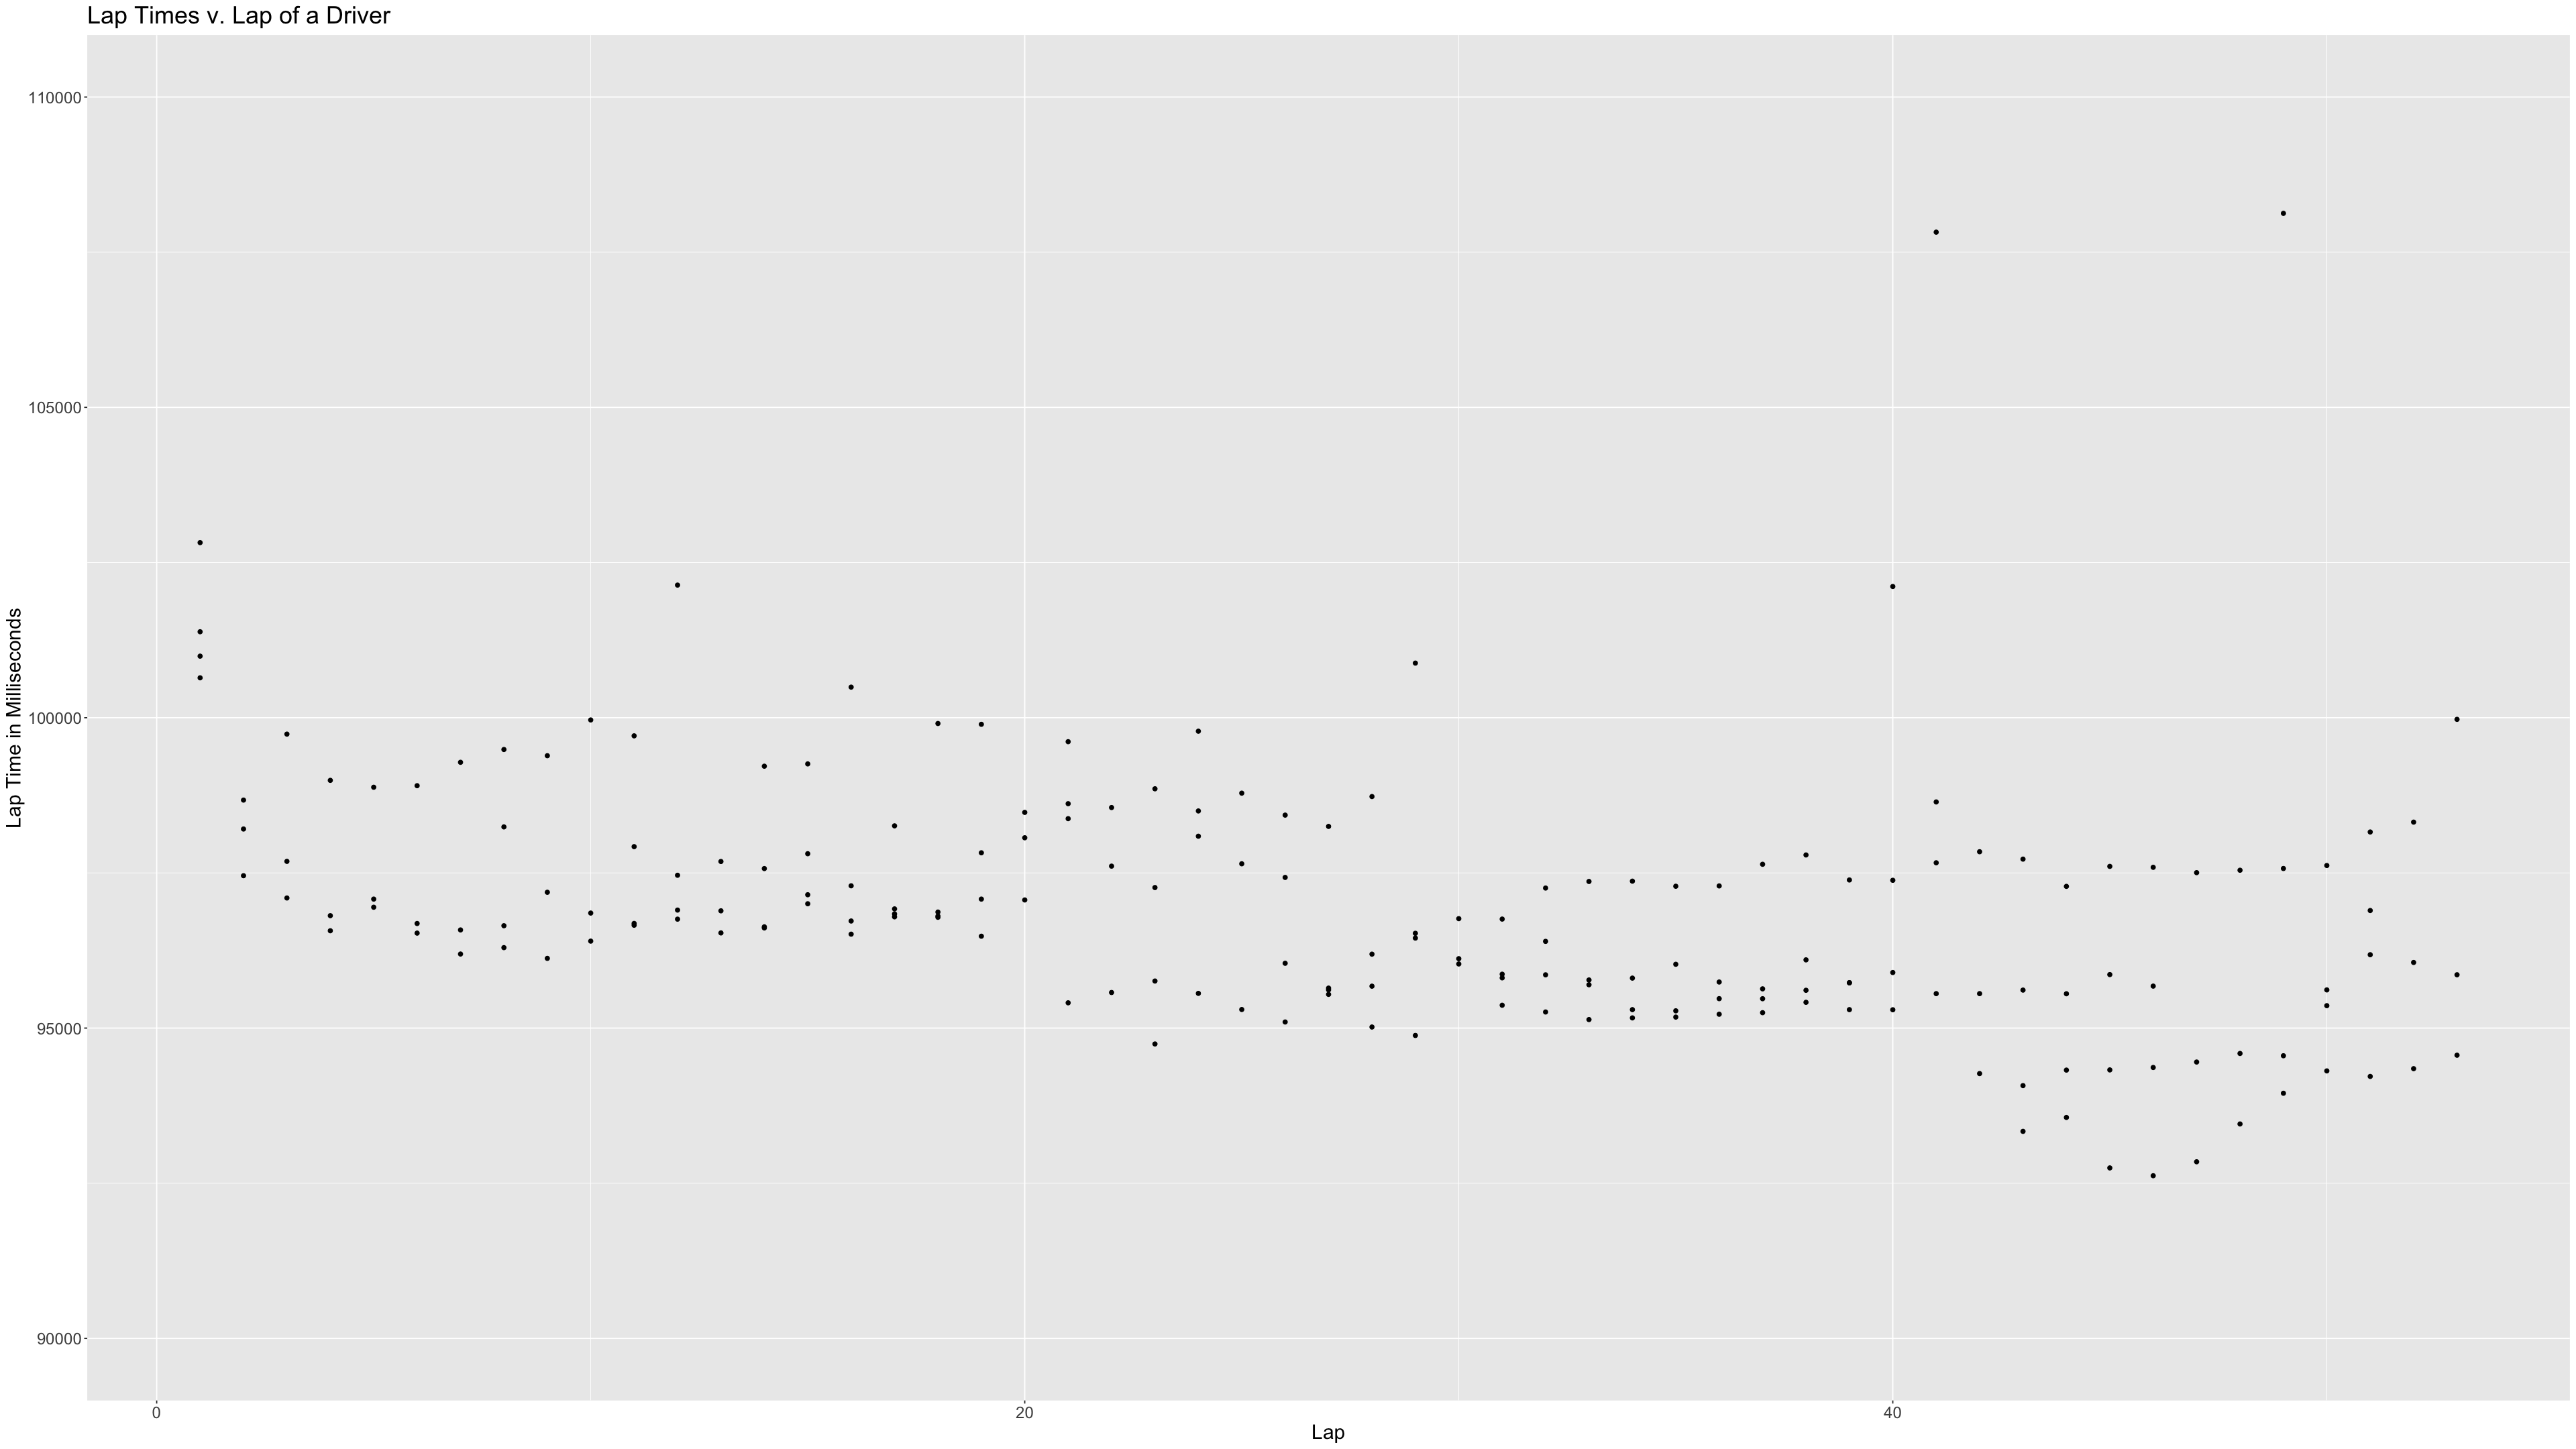

In [503]:
lap_vis_data <- per_laps %>%
                filter(raceId %in% japan_race_ID)
    

lap_vis <- ggplot(lap_vis_data, aes(x = lap, y = milliseconds)) + 
            geom_point() +
            labs(x = "Lap", y = "Lap Time in Milliseconds") +
            ggtitle("Lap Times v. Lap of a Driver") + 
            theme(text = element_text(size = 18)) + 
            ylim(c(90000,110000))

lap_vis 

Given that the pretext for this predictive analysis certainly does not fit that of classification or clustering, it would be ideal to assess drivers by predicting their lap times for a given race. 

It can it noticed in the plot above that there are multiple lap times for each lap and the lap times fluctuate. Given that we are trying to predict the response variable of `milliseconds` using `lap` as the predictor. K-nearest neighbours regression in this case would not be the best choice as multiple exact observations aldready exist for `laps`. 

On the other hand, linear regression would be suited much better for this task since the trend between `milliseconds` and `lap` is expected to be quite linear throughout a race. **Hence, for our predictive analysis we will be using lap data for each driver at each of the 22 locations to predict a race time for that race using linear regression.**  

### 4.1 - Linear Regression Process

#### 4.1.1 - Using Functions To Abstract Data Analysis

As described above, using linear regression on past lap data, we are going to predict a race time for each driver in each race. That is will be predicting a total of 22 race times for 20 drivers, amounting to a total of 440 regression models.

Since conducting 440 linear regression models would be extremely time-consuming we will utilizing functions to expedite this process, such that it would take a fraction of the projected time.  

In order to deploy the process of linear regression using functions, we have broken up the process to consist of two main functions 

1. initiate_split_data 
2. initiate_linear_regression

The **initiate_split_data** is a function that utilizes a object containing split data declared as `formulaone_split` to make two seperate data frames. One containing all training observations and the other containing the testing observations.

In [504]:
initiate_split_data <- function(){
    formulaone_train <<- training(formulaone_split)
    formulaone_test <<- testing(formulaone_split) 
}

The **initiate_linear_regression** is the function responsible for conducting the linear regression in 5 main steps:

1. Creates a model specification `formulaone_spec` 

2. Creates a recipe using `milliseconds` as the response variable and a single predictor `lap` using the data object `formulaone_train` created in initiate_split_data. 

3. Combines the model and recipe using a workflow and fits the training data `formulaone_train` onto it.

4. Uses `formulaone_fit` and `formulaone_test` to predict race times for all observations in the testing data and binding the columns of the predictions to it. After which it uses the metrics function to obtain all metrics related to the regression model. 

5. Visualizes and plots the training data as `lap` versus `milliseconds` overlaying the model prediction as a blue line. 

In [ ]:
initiate_linear_regression <- function(){
    
    #1. 
    
    formulaone_spec <<- linear_reg() %>%
      set_engine("lm") %>%
      set_mode("regression")

    #2. 
    
    formulaone_recipe <<- recipe(milliseconds ~ lap, data = formulaone_train)

    #3.
    
    formulaone_fit <<- workflow() %>%
      add_recipe(formulaone_recipe) %>%
      add_model(formulaone_spec) %>%
      fit(data = formulaone_train)

    #4. 
    
    formulaone_test_results <<- formulaone_fit %>%
      predict(formulaone_test) %>%
      bind_cols(formulaone_test) %>%
      metrics(truth = milliseconds, estimate = .pred)

    #5. 
    
    formulaone_plot_final <<- ggplot(formulaone_train, aes(x = lap, y = milliseconds)) +
      geom_point(alpha = 0.4) +
      xlab("Lap") +
      ylab("Milliseconds") +
      geom_smooth(method = "lm", se = FALSE) +
      ggtitle("Predicted Lap Times vs. Laps") +
      theme(text = element_text(size = 30))

    formulaone_plot_final
}

#### 4.1.2 - Applying Functions In Predicting Race Time For A Sample Driver

Now that these functions have created, we will use them to predict the race time for a sample driver, Fernando Alonso, for a sample race round, that is round seven in Monaco. This process will be conducted in 5 steps which are described and linked to their respective parts in the code below. For ease of viewing. the first few rows of signifcant data sets have also been printed:

1. We begin by setting the seed within the cell to ensure that all following results are reproducible. Then we filter the drivers' laps `alo_laps` which are aldready within the scope of races and time that we are looking at, by `raceId` for all races that have taken place in Monaco using `monaco_race_ID` to obtain the specified lap data. 

2. We then use the tibble created above `fa_monaco` and group all observations by `raceId`, summarizing each race by the number of laps `n` and arranging them in numerically increasing order of their `raceId` placing them into `fa_monaco_clean`.

3. Consequently we pull those `race_Id`'s as a vector into `fa_monaco_clean_ID`.

3. Now that we know which races to use in predicting lap times for the driver at the specific location, we filter the driver's lap data `alo_laps` by `raceId` for only those `raceId`'s present in `fa_monaco_clean_ID`. Arranging them in descending order of milliseconds, we then remove any outliers using the `slice` function into `fa_monaco_races`

5. Having all required lap data, we now split `fa_monaco_races` into the training and testing sets assigning it to `formulaone_split` which will be used by the **initiate_split_data** function. 

> Note: In order to split`fa_monaco_races` we first had to decide the percentage by which observations would be split into the training and testing sets. It is important to consider the trade-off of having more observations in both sets. While having more observations in the training data set increases the robustness of the model, it decreases the ability to accurately predict the error of the model and vice versa. Considering that fact that we are looking at a very specific time frame as well as the fact that some drivers may be more experienced than others leading to more data in some cases, our main priority is to build a robust model. As such, we chose the value of `prop` so that 75% of the observations represent the training data and 25% represent testing data. This would allow us to build a more robust model that has "seen" more data, while also allowing its fair assessment.

In [525]:
set.seed(2022)

#Round 7 - Monaco

### FILTERING DATA


#1

fa_monaco <- alo_laps %>%
                filter(raceId %in% monaco_race_ID)

head(fa_monaco)

#2

fa_monaco_clean <- fa_monaco %>%
                    group_by(raceId) %>%
                    summarize(n = n()) %>%
                    arrange(desc(n)) 

fa_monaco_clean

#3

fa_monaco_clean_ID <- fa_monaco_clean %>%
                        pull(raceId)

fa_monaco_clean_ID

#4 

fa_monaco_races <- alo_laps %>%
                    filter(raceId %in% fa_monaco_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

head(fa_monaco_races)

#5 

formulaone_split <- initial_split(fa_monaco_races, prop = 0.75, strata = milliseconds)

raceId,driverId,lap,position,time,milliseconds
<dbl>,<dbl>,<dbl>,<dbl>,<time>,<dbl>
953,4,1,8,02:35:00,155781
953,4,2,8,02:13:00,133519
953,4,3,8,02:08:00,128107
953,4,4,8,02:08:00,128432
953,4,5,8,02:09:00,129161
953,4,6,8,02:09:00,129335


raceId,n
<dbl>,<int>
953,78
1056,77
994,52


[1]  953 1056  994

raceId,driverId,lap,position,time,milliseconds
<dbl>,<dbl>,<dbl>,<dbl>,<time>,<dbl>
953,4,6,8,02:09:00,129335
953,4,5,8,02:09:00,129161
953,4,4,8,02:08:00,128432
953,4,3,8,02:08:00,128107
953,4,7,8,02:06:00,126434
953,4,9,8,01:57:00,117520


Having split the data, we now proceed to the process of linear regression. Before doing do, we call `initiate_split_data` to seperate the split data into distinct training and testing sets. 

> Note: The training and testing sets, respectively named `formulaone_train` and `formulaone_test` are not visible in the cell, and they are accessible after the function has been called. For demonstration, the first few rows of these sets which would not be there otherwise, have been explicitly printed using `head`.

Now that the data has been split and seperated, we call `initiate_linear_regression` to begin the process of linear regression as described above. To confirm that the all steps are being carried out we again explicitly print the model specification, recipe, fit object, as well as the results in addition to regression plot which would be printed by `initiate_linear_regression()` automatically. 

In [534]:
### SEPERATES DATA

initiate_split_data()

#______________________________

head(formulaone_train)

head(formulaone_test)

raceId,driverId,lap,position,time,milliseconds
<dbl>,<dbl>,<dbl>,<dbl>,<time>,<dbl>
1056,4,20,14,01:17:00,77648
1056,4,18,14,01:17:00,77636
1056,4,43,12,01:17:00,77602
1056,4,14,14,01:17:00,77529
994,4,22,9,01:17:00,77484
1056,4,31,13,01:17:00,77473


raceId,driverId,lap,position,time,milliseconds
<dbl>,<dbl>,<dbl>,<dbl>,<time>,<dbl>
953,4,9,8,01:57:00,117520
953,4,8,8,01:54:00,114138
953,4,10,8,01:46:00,106046
953,4,35,5,01:42:00,102965
953,4,12,8,01:39:00,99583
953,4,19,9,01:37:00,97085


`geom_smooth()` using formula 'y ~ x'



Linear Regression Model Specification (regression)

Computational engine: lm 


Recipe

Inputs:

      role #variables
   outcome          1
 predictor          1

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)          lap  
    89879.3       -176.7  


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,8659.9901031
rsq,standard,0.2174498
mae,standard,6278.0747118


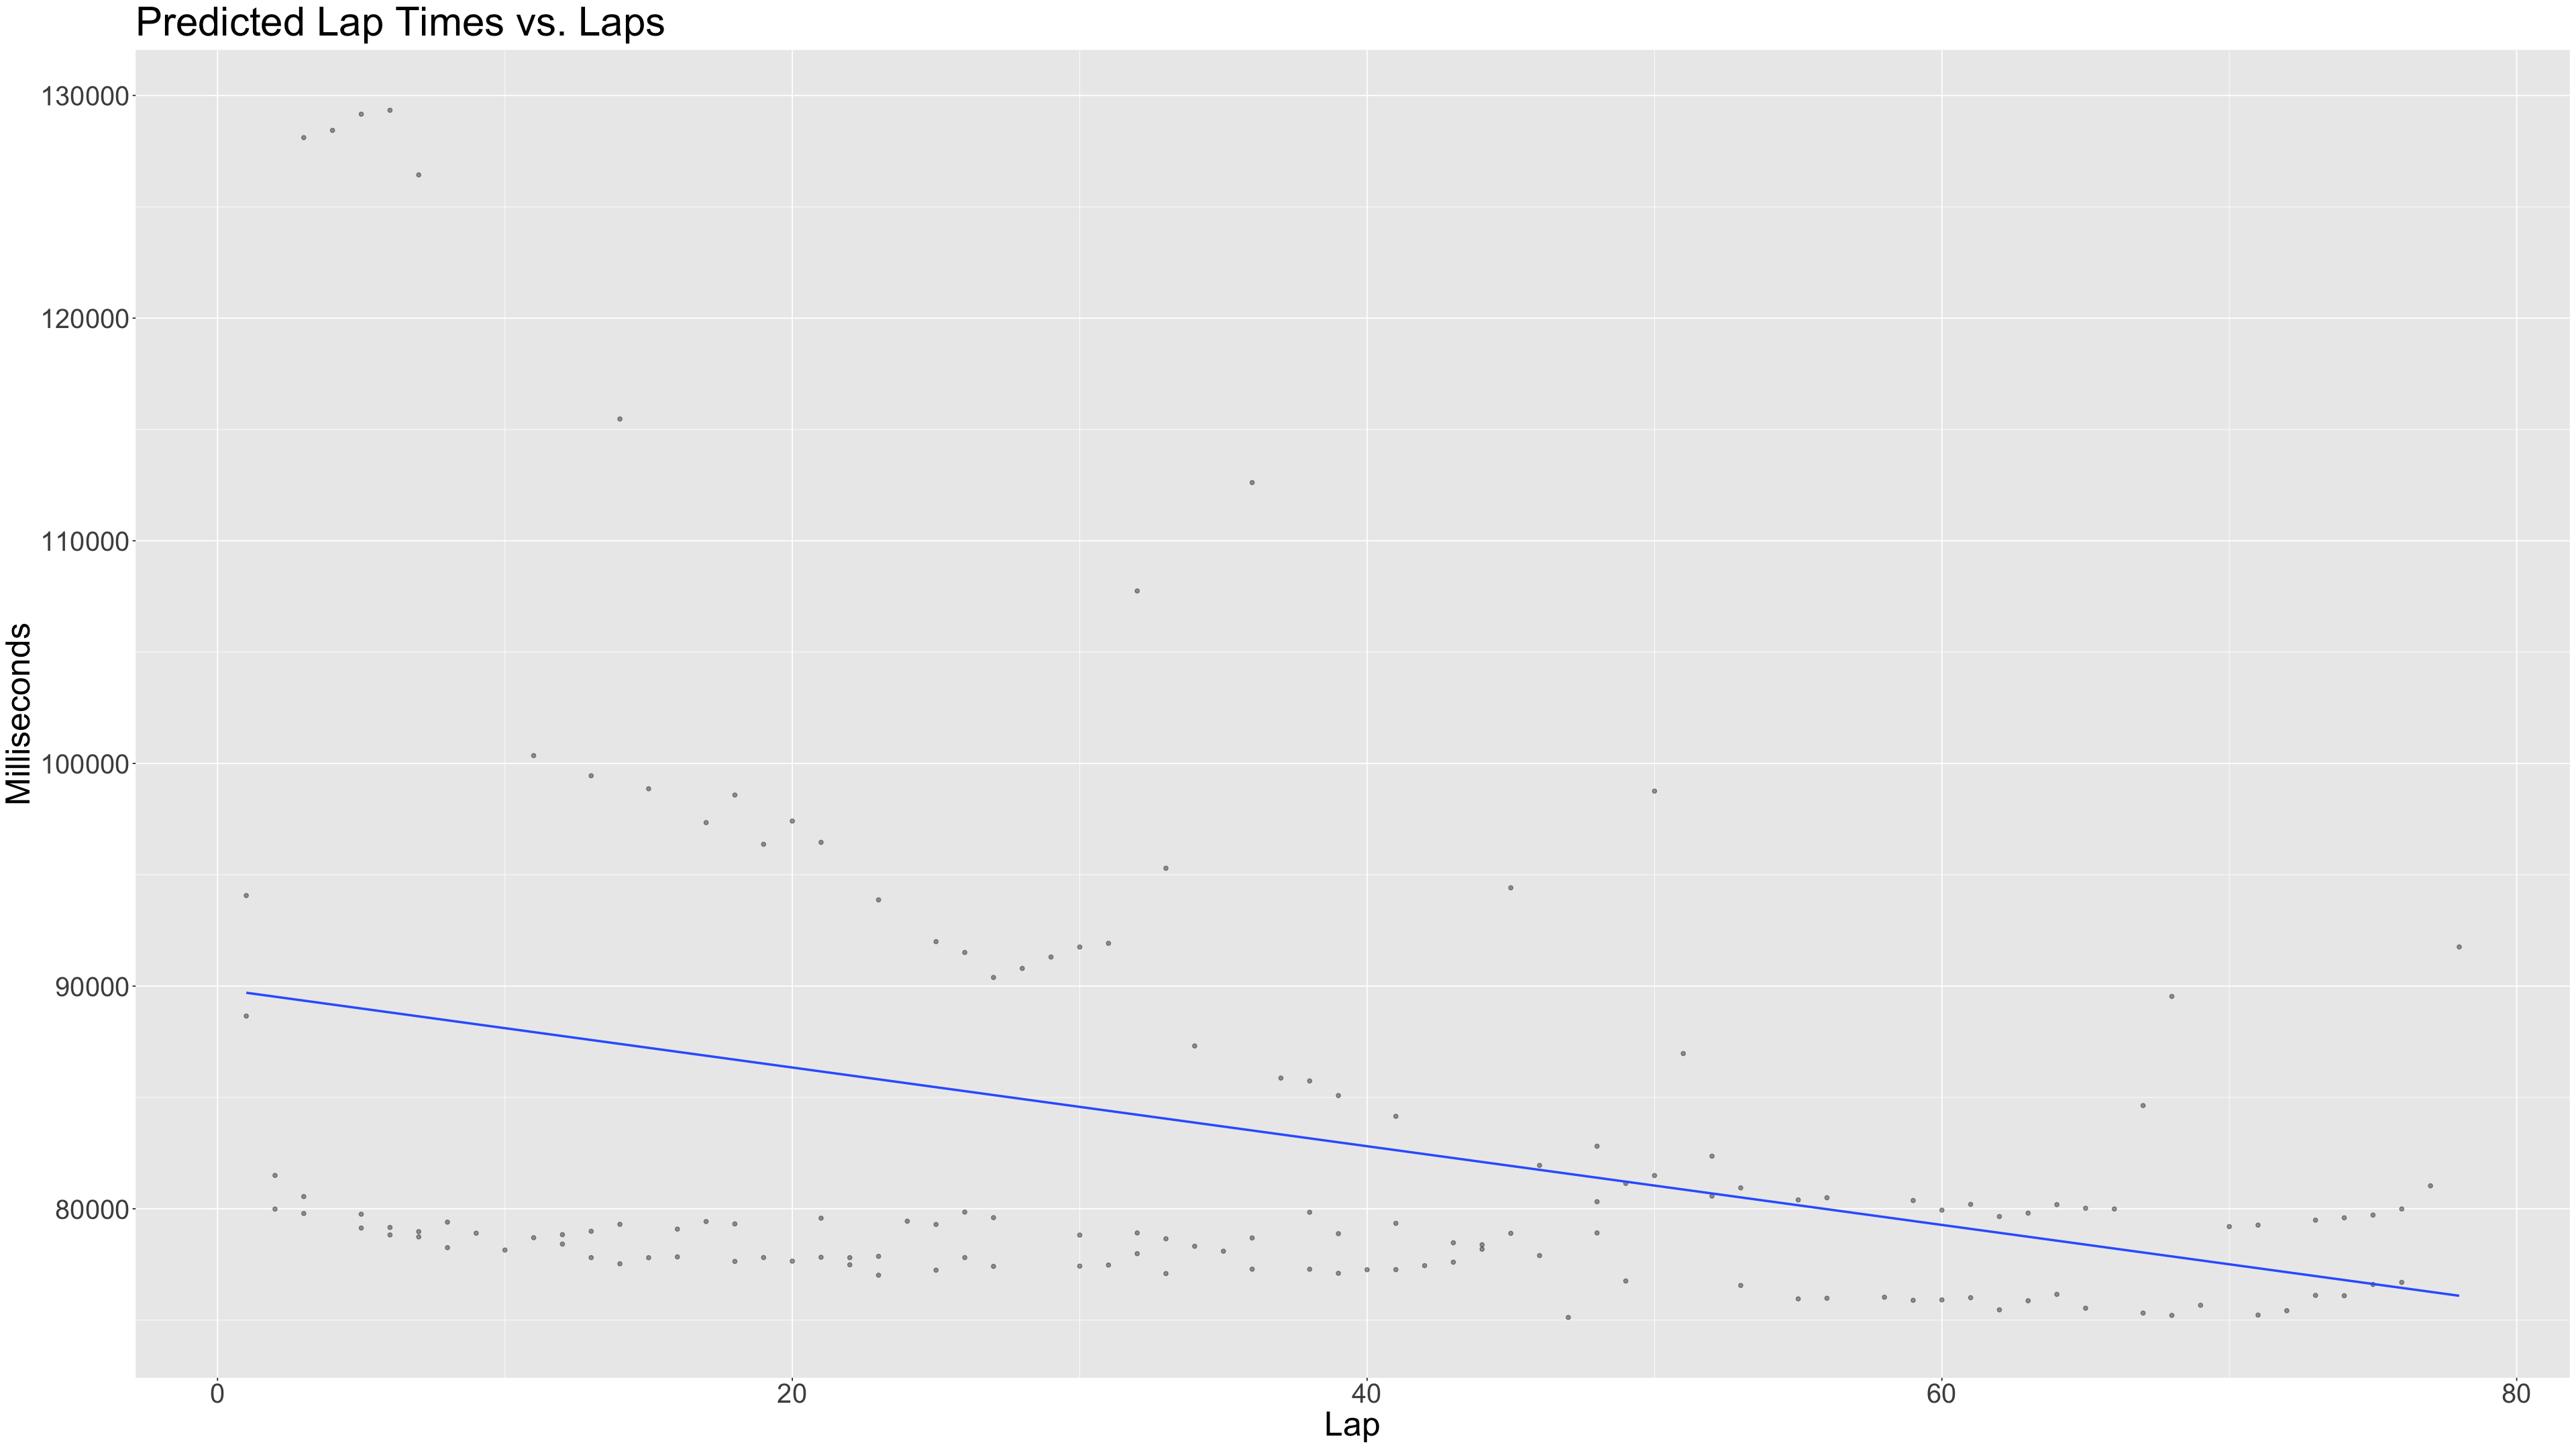

In [537]:
### RUNS REGRESSION

initiate_linear_regression()

#______________________________

formulaone_spec

formulaone_recipe

formulaone_fit

formulaone_test_results

#### 4.1.3 - Extracting Regression Evaluation

In addition to having functions that simplify the seperation and linear regression processes. An additional function `initiate_rmse` was created to assist in filtering `formulaone_test_results` specifically for filtering out the **root mean square prediction error** and mutating that data frame to add the round of race specified through a object named `round_n` into `race_rmse` of that value. 

In [636]:
initiate_rmse <- function(){
  race_rmse <<- formulaone_test_results %>% 
                    filter(.metric == "rmse") %>% 
                    mutate(Round = round_n)
  race_rmse
    
  rmse_col <<- rbind(rmse_col, race_rmse)
}

However, it is important to note that the linear regression carried out above was conducted for only one driver at one location. Factoring in that many additional models will need to be created for one driver which will be represented through seperate objects. An extra line of code was added which binds `race_rmse` to an empty data frame `rmse_col`. 

By creating a collection object `rmse_col` in which all `race_rmse`'s are automatically collected, this creates a "bin" over which we have full control which effectively eliminates the need to gather and bind all data frames containing the rmspe values at the end of our analysis for each driver. Quite simply as the regression for each driver is carried out round by round, `initiate_rmse` ensures that all needed results are filtered and collected all at once.  

To illustrate this, we first specify the collection data frame `rmse_col`, in order to be able reset the collected data, by creating a data frame with the exact column names as specified before. Then we specify `round_n` equals the integer 7, that is the round of the race. After this, we simply collect the filtered results of the regression carried out above into the "bin". 

In [649]:
rmse_col <- data.frame(.metric = character(), .estimator = character(), .estimate = double(), Round = double(), stringsAsFactors = FALSE) 

rmse_col

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>


In [650]:
round_n <- 7

initiate_rmse() 

rmse_col

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>
rmse,standard,8659.99,7


> Note: Due to properties of binding, calling `initiate_rmse()` will bind the same results again if called upon more than once resulting in duplicated observations. This is fixed by re-running `rmse_col`.

In doing so, it appears that all steps have been executed correctly and `rmse_col` only contains the rmspe, which is the exact value of 8659.99 as seen above. This value represents the error that is possibly present between in all predicted lap times in milliseconds. 

#### 4.1.4 Combining Lap Times into Race Time

Now that the regression has been carried out and the model has been evaluted, let us shift gears towards the final goal. As mentioned, we have set out to predict a race time for each driver at each race. Given that the regression model predicts lap times, we can use the model to predict a race for each of the number of laps in a given race by using the real number laps that have been scheduled.

Given that this task can be quite cumbersome considering that we plan on predicting race times for all races, we again use functions to assist us in doing so.

Having known that many of the 22 scheduled races differ in the number of laps, we create a function named, get_*location*_prediction where *location* is the respective location of that race. In this case, `get_monaco_prediction` has been specifically created in order to attain the race time for all drivers in Monaco. However, for the current purposes, we will be using the regression for Fernando Alonso demonstrated above.

`get_monaco_prediction` calculates the predicted race time in 4 steps: 

1. Using `predict` with the `formulaone_fit` object created by `initiate_linear_regression()`, as well as a tibble of laps numbered 1-78, as obtained from https://www.formula1.com/en/racing/2022/Monaco/Circuit.html, it predicts times for all laps labelling them using mutate by lap number, and them summarizing them to obtain a race time consisting of all the lap times predicted.  

2. Adds a column `race_time_mins` for better understanding by dividing the race time by 60000 (1 min = 60000 ms)

3. Adds another column `race_time_hrs` with the race time in hours and labels the time with the `round_n` specified above, printing out the data frame. 

4. Since only the racetime at one location has been predicted for this driver, given that race times for additional locations for the same driver will also be calculated, we again use an automatic collection process that binds `predict_all` containing racetimes of a round to an empty data frame, `racetime_col`, which will be used for collecting all 22 racetimes for one driver.

In [651]:
get_monaco_prediction <- function(){
    
    #1
    predict_ms <<- predict(formulaone_fit, tibble(lap = c(1:78))) %>%
        mutate(lap = 1:78) %>%
        summarise(race_time_milliseconds = sum(.pred)) 

    #2
    predict_mins <<- predict_ms %>%
        mutate(race_time_mins = race_time_milliseconds/60000)
    
    #3
    predict_all <<- predict_mins %>%
         mutate(race_time_hrs = race_time_milliseconds/3600000) %>% 
         mutate(Round = round_n)
    
    #4
    racetime_col <<- rbind(racetime_col, predict_all)
    
    predict_all
}


The process is shown below:

In [659]:
## Create Bin (Step 0)

racetime_col <- data.frame(race_time_milliseconds = double(), race_time_mins = double(), race_time_hrs = double()) 

racetime_col

race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>


In [660]:
get_monaco_prediction()

#____________

racetime_col

race_time_milliseconds,race_time_mins,race_time_hrs,Round
<dbl>,<dbl>,<dbl>,<dbl>
6466044,107.7674,1.796123,7


race_time_milliseconds,race_time_mins,race_time_hrs,Round
<dbl>,<dbl>,<dbl>,<dbl>
6466044,107.7674,1.796123,7


> Note: Due to properties of binding, calling `get_monaco_prediction()` will again bind the same results again if called upon more than once resulting in duplicated observations. 

After calling `get_monaco_prediction()` it can be seen that `predict_all` first automatically prints as expected and manually printing `racetime_col` is allows to check that `racetime_col` was sucessfully and correctly binded with `predict_all`.

### 4.2 - Regression Scaling

Having concluded the process of predicting the race time for a sample driver at a sample location, it is beneficial to now determine how this process can be applied on much larger scale, simply how can it be repeated 439 more times? 

While coming up with an answer to this question, we first needed to thoughtfully examine phases 1, 3, and 4.1 to identify major similarities and common interesecting points. Although we could have do all of the 440 regression models placed in this file, it would be extremely inefficient and visually unappealing. To solve these challenges, while also keeping in mind the requirements of this report, where in everything must be placed in one file, we decided to structure our entire process for all drivers and races across the season as following: 

1. In the project remote repository, we created a directory `Lap_Wrangling` in which we created an additional 20 .ipynb files each corresponding to the predictions for a driver. All files are named as *driver intials*_laps. 

2. To reduce repetition in the analysis, we then created a sub-directory `source` where in all common data would be placed. 

3. 

### 4.3 - Regression Complications

# Results

## Phase 1: Loading Regression Results

In [25]:
### Final Race Time Data

aa_race <- read_csv("https://raw.githubusercontent.com/TaylorOglow/Formula_1/main/Lap%20Wrangling/final_race_data/aa_race.csv")

cl_race <- read_csv("https://raw.githubusercontent.com/TaylorOglow/Formula_1/main/Lap%20Wrangling/final_race_data/cl_race.csv")

cs_race <- read_csv("https://raw.githubusercontent.com/TaylorOglow/Formula_1/main/Lap%20Wrangling/final_race_data/cs_race.csv")

dr_race <- read_csv("https://raw.githubusercontent.com/TaylorOglow/Formula_1/main/Lap%20Wrangling/final_race_data/dr_race.csv")

eo_race <- read_csv("https://raw.githubusercontent.com/TaylorOglow/Formula_1/main/Lap%20Wrangling/final_race_data/eo_race.csv")

fa_race <- read_csv("https://raw.githubusercontent.com/TaylorOglow/Formula_1/main/Lap%20Wrangling/final_race_data/fa_race.csv")

gr_race <- read_csv("https://raw.githubusercontent.com/TaylorOglow/Formula_1/main/Lap%20Wrangling/final_race_data/gr_race.csv")

km_race <- read_csv("https://raw.githubusercontent.com/TaylorOglow/Formula_1/main/Lap%20Wrangling/final_race_data/km_race.csv")

lh_race <- read_csv("https://raw.githubusercontent.com/TaylorOglow/Formula_1/main/Lap%20Wrangling/final_race_data/lh_race.csv")

ln_race <- read_csv("https://raw.githubusercontent.com/TaylorOglow/Formula_1/main/Lap%20Wrangling/final_race_data/ln_race.csv")

ls_race <- read_csv("https://raw.githubusercontent.com/TaylorOglow/Formula_1/main/Lap%20Wrangling/final_race_data/ls_race.csv")

ms_race <- read_csv("https://raw.githubusercontent.com/TaylorOglow/Formula_1/main/Lap%20Wrangling/final_race_data/ms_race.csv")

mv_race <- read_csv("https://raw.githubusercontent.com/TaylorOglow/Formula_1/main/Lap%20Wrangling/final_race_data/mv_race.csv")

nl_race <- read_csv("https://raw.githubusercontent.com/TaylorOglow/Formula_1/main/Lap%20Wrangling/final_race_data/nl_race.csv")

pg_race <- read_csv("https://raw.githubusercontent.com/TaylorOglow/Formula_1/main/Lap%20Wrangling/final_race_data/pg_race.csv")

sp_race <- read_csv("https://raw.githubusercontent.com/TaylorOglow/Formula_1/main/Lap%20Wrangling/final_race_data/sp_race.csv")

sv_race <- read_csv("https://raw.githubusercontent.com/TaylorOglow/Formula_1/main/Lap%20Wrangling/final_race_data/sv_race.csv")

vb_race <- read_csv("https://raw.githubusercontent.com/TaylorOglow/Formula_1/main/Lap%20Wrangling/final_race_data/vb_race.csv")

yt_race <- read_csv("https://raw.githubusercontent.com/TaylorOglow/Formula_1/main/Lap%20Wrangling/final_race_data/yt_race.csv")

zg_race <- read_csv("https://raw.githubusercontent.com/TaylorOglow/Formula_1/main/Lap%20Wrangling/final_race_data/zg_race.csv")

Parsed with column specification:
cols(
  Round = col_double(),
  .metric = col_character(),
  .estimator = col_character(),
  .estimate = col_double(),
  race_time_milliseconds = col_double(),
  race_time_mins = col_double(),
  race_time_hrs = col_double()
)

Parsed with column specification:
cols(
  Round = col_double(),
  .metric = col_character(),
  .estimator = col_character(),
  .estimate = col_double(),
  race_time_milliseconds = col_double(),
  race_time_mins = col_double(),
  race_time_hrs = col_double()
)

Parsed with column specification:
cols(
  Round = col_double(),
  .metric = col_character(),
  .estimator = col_character(),
  .estimate = col_double(),
  race_time_milliseconds = col_double(),
  race_time_mins = col_double(),
  race_time_hrs = col_double()
)

Parsed with column specification:
cols(
  Round = col_double(),
  .metric = col_character(),
  .estimator = col_character(),
  .estimate = col_double(),
  race_time_milliseconds = col_double(),
  race_time_mins = col_

## Phase 2: Wrangling Regression Results

In [26]:
aa_race <- aa_race %>%
            mutate(Driver = "Alexander Albon") %>%
            mutate(Team = "Williams")

cl_race <- cl_race %>%
            mutate(Driver = "Charles Leclerc") %>%
            mutate(Team = "Ferrari")

cs_race <- cs_race %>%
            mutate(Driver = "Carlos Sainz Jr.") %>%
            mutate(Team = "Ferrari")

dr_race <- dr_race %>%
            mutate(Driver = "Daniel Ricciardo") %>% 
            mutate(Team = "McLaren")

eo_race <- eo_race %>%
           mutate(Driver = "Esteban Ocon") %>% 
           mutate(Team = "Alpine")

fa_race <- fa_race %>%
           mutate(Driver = "Fernando Alonso") %>% 
           mutate(Team = "Alpine")

gr_race <- gr_race %>%
           mutate(Driver = "George Russell") %>%
           mutate(Team = "Mercedes")

km_race <- km_race %>%
           mutate(Driver = "Kevin Magnussen") %>%
           mutate(Team = "Haas F1 Team")

lh_race <- lh_race %>%
           mutate(Driver = "Lewis Hamilton")  %>%
           mutate(Team = "Mercedes")

ln_race <- ln_race %>%
           mutate(Driver = "Lando Norris") %>% 
           mutate(Team = "McLaren")

ls_race <- ls_race %>%
           mutate(Driver = "Lance Stroll") %>%
           mutate(Team = "Aston Martin")

ms_race <- ms_race %>%
           mutate(Driver = "Mick Schumacher") %>%
           mutate(Team = "Haas F1 Team")

mv_race <- mv_race %>%
           mutate(Driver = "Max Verstappen") %>%
           mutate(Team = "Red Bull Racing")

nl_race <- nl_race %>%
           mutate(Driver = "Nicholas Latfifi") %>%
           mutate(Team = "Williams")

pg_race <- pg_race %>%
           mutate(Driver = "Pierre Gasly")  %>%
           mutate(Team = "AlphaTauri")

sp_race <- sp_race %>%
           mutate(Driver = "Sergio Pérez") %>%
           mutate(Team = "Red Bull Racing")

sv_race <- sv_race %>%
           mutate(Driver = "Sebastian Vettel")  %>%
           mutate(Team = "Aston Martin")

vb_race <- vb_race %>%
           mutate(Driver = "Valtteri Bottas") %>%
           mutate(Team = "Alfa Romeo")

yt_race <- yt_race %>%
           mutate(Driver = "Yuki Tsunoda") %>%
           mutate(Team = "AlphaTauri")

zg_race <- zg_race %>%
           mutate(Driver = "Zhou Guanyu") %>%
           mutate(Team = "Alfa Romeo")

In [27]:
season_combined <- rbind(aa_race, cl_race, cs_race, dr_race, eo_race, fa_race, gr_race, km_race, lh_race, ln_race, ls_race, ms_race, mv_race,
                          nl_race, pg_race, sp_race, sv_race, vb_race, yt_race, zg_race) %>% 
                            group_by(Round) %>% 
                            arrange(by = race_time_milliseconds) %>%
                            mutate(Finish = row_number()) %>%
                            arrange(by = Finish)

points <- c(25, 18, 15, 12, 10, 8, 6, 4, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


season_points <- season_combined %>% 
                    group_by(Round) %>%
                    mutate(Points = (Finish * 0) + points)

# tes1111 <- season_points %>% group_by(Driver) %>% summarize(T = sum(Points)) %>% arrange(T)

write_csv(season_points, "season_model")

## Phase 3: World Championship Results

### Constructors' World Championship

Parsed with column specification:
cols(
  Round = col_double(),
  .metric = col_character(),
  .estimator = col_character(),
  .estimate = col_double(),
  race_time_milliseconds = col_double(),
  race_time_mins = col_double(),
  race_time_hrs = col_double(),
  Driver = col_character(),
  Team = col_character(),
  Finish = col_double(),
  Points = col_double()
)



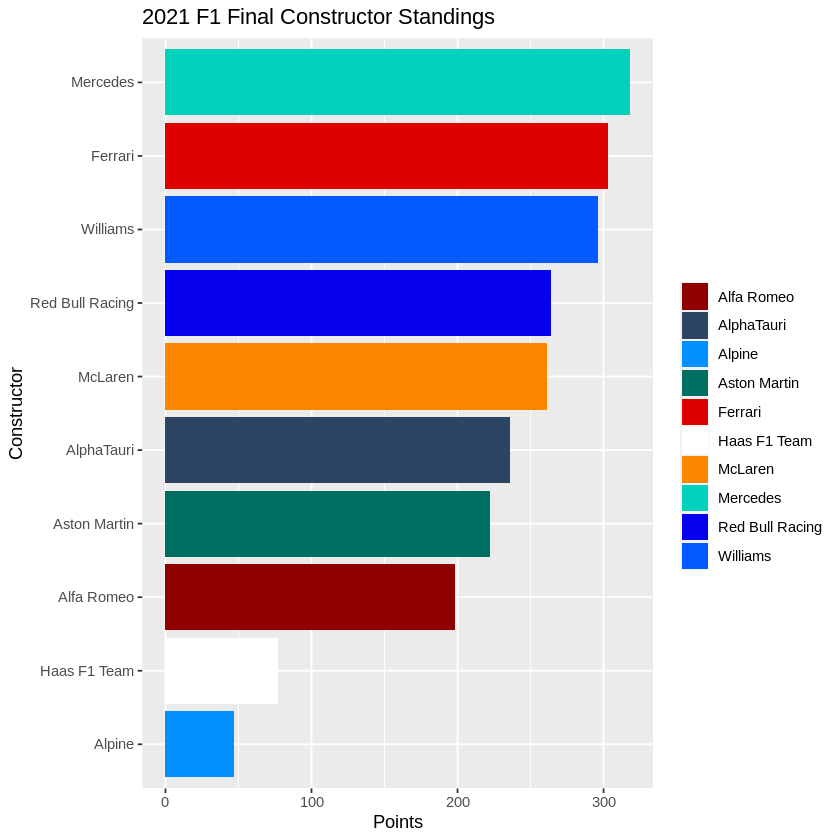

In [46]:
#Visualizing the 2021 constructor data into a bar chart, using constructors.csv and constructor standings.csv
point_data <- read_csv("https://raw.githubusercontent.com/TaylorOglow/Formula_1/main/season_model")

constructor_filtered <- point_data %>%
    select (Team, Points) %>%
    group_by(Team) 

#changes raceId and Constructor Id coltype to <fct> 
constructor_filtered$Points <- as.numeric(constructor_filtered$Points)

constructors_championship <- constructor_filtered %>%
    summarize_all(sum)

constructor_bar <- constructors_championship %>% 
    ggplot(aes(reorder(Team, +Points), Points, fill = Team)) +
    geom_bar (stat = "identity")+
    scale_fill_manual(values = c("#900000",
                                 "#2B4562",
                                 "#0090FF",
                                 "#006F62",
                                 "#DC0000",
                                 "#FFFFFF",
                                 "#FF8700",
                                 "#00D2BE",
                                 "#0600EF",
                                 "#005AFF"))+ 
    labs (title = "2021 F1 Final Constructor Standings", 
         x = "Constructor",
         y = "Points",
         fill = "") 

constructor_flipped<- constructor_bar+coord_flip ()
constructor_flipped

### Drivers' World Championship

Parsed with column specification:
cols(
  Points_UTR = col_double(),
  Round = col_double(),
  Driver = col_character()
)

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



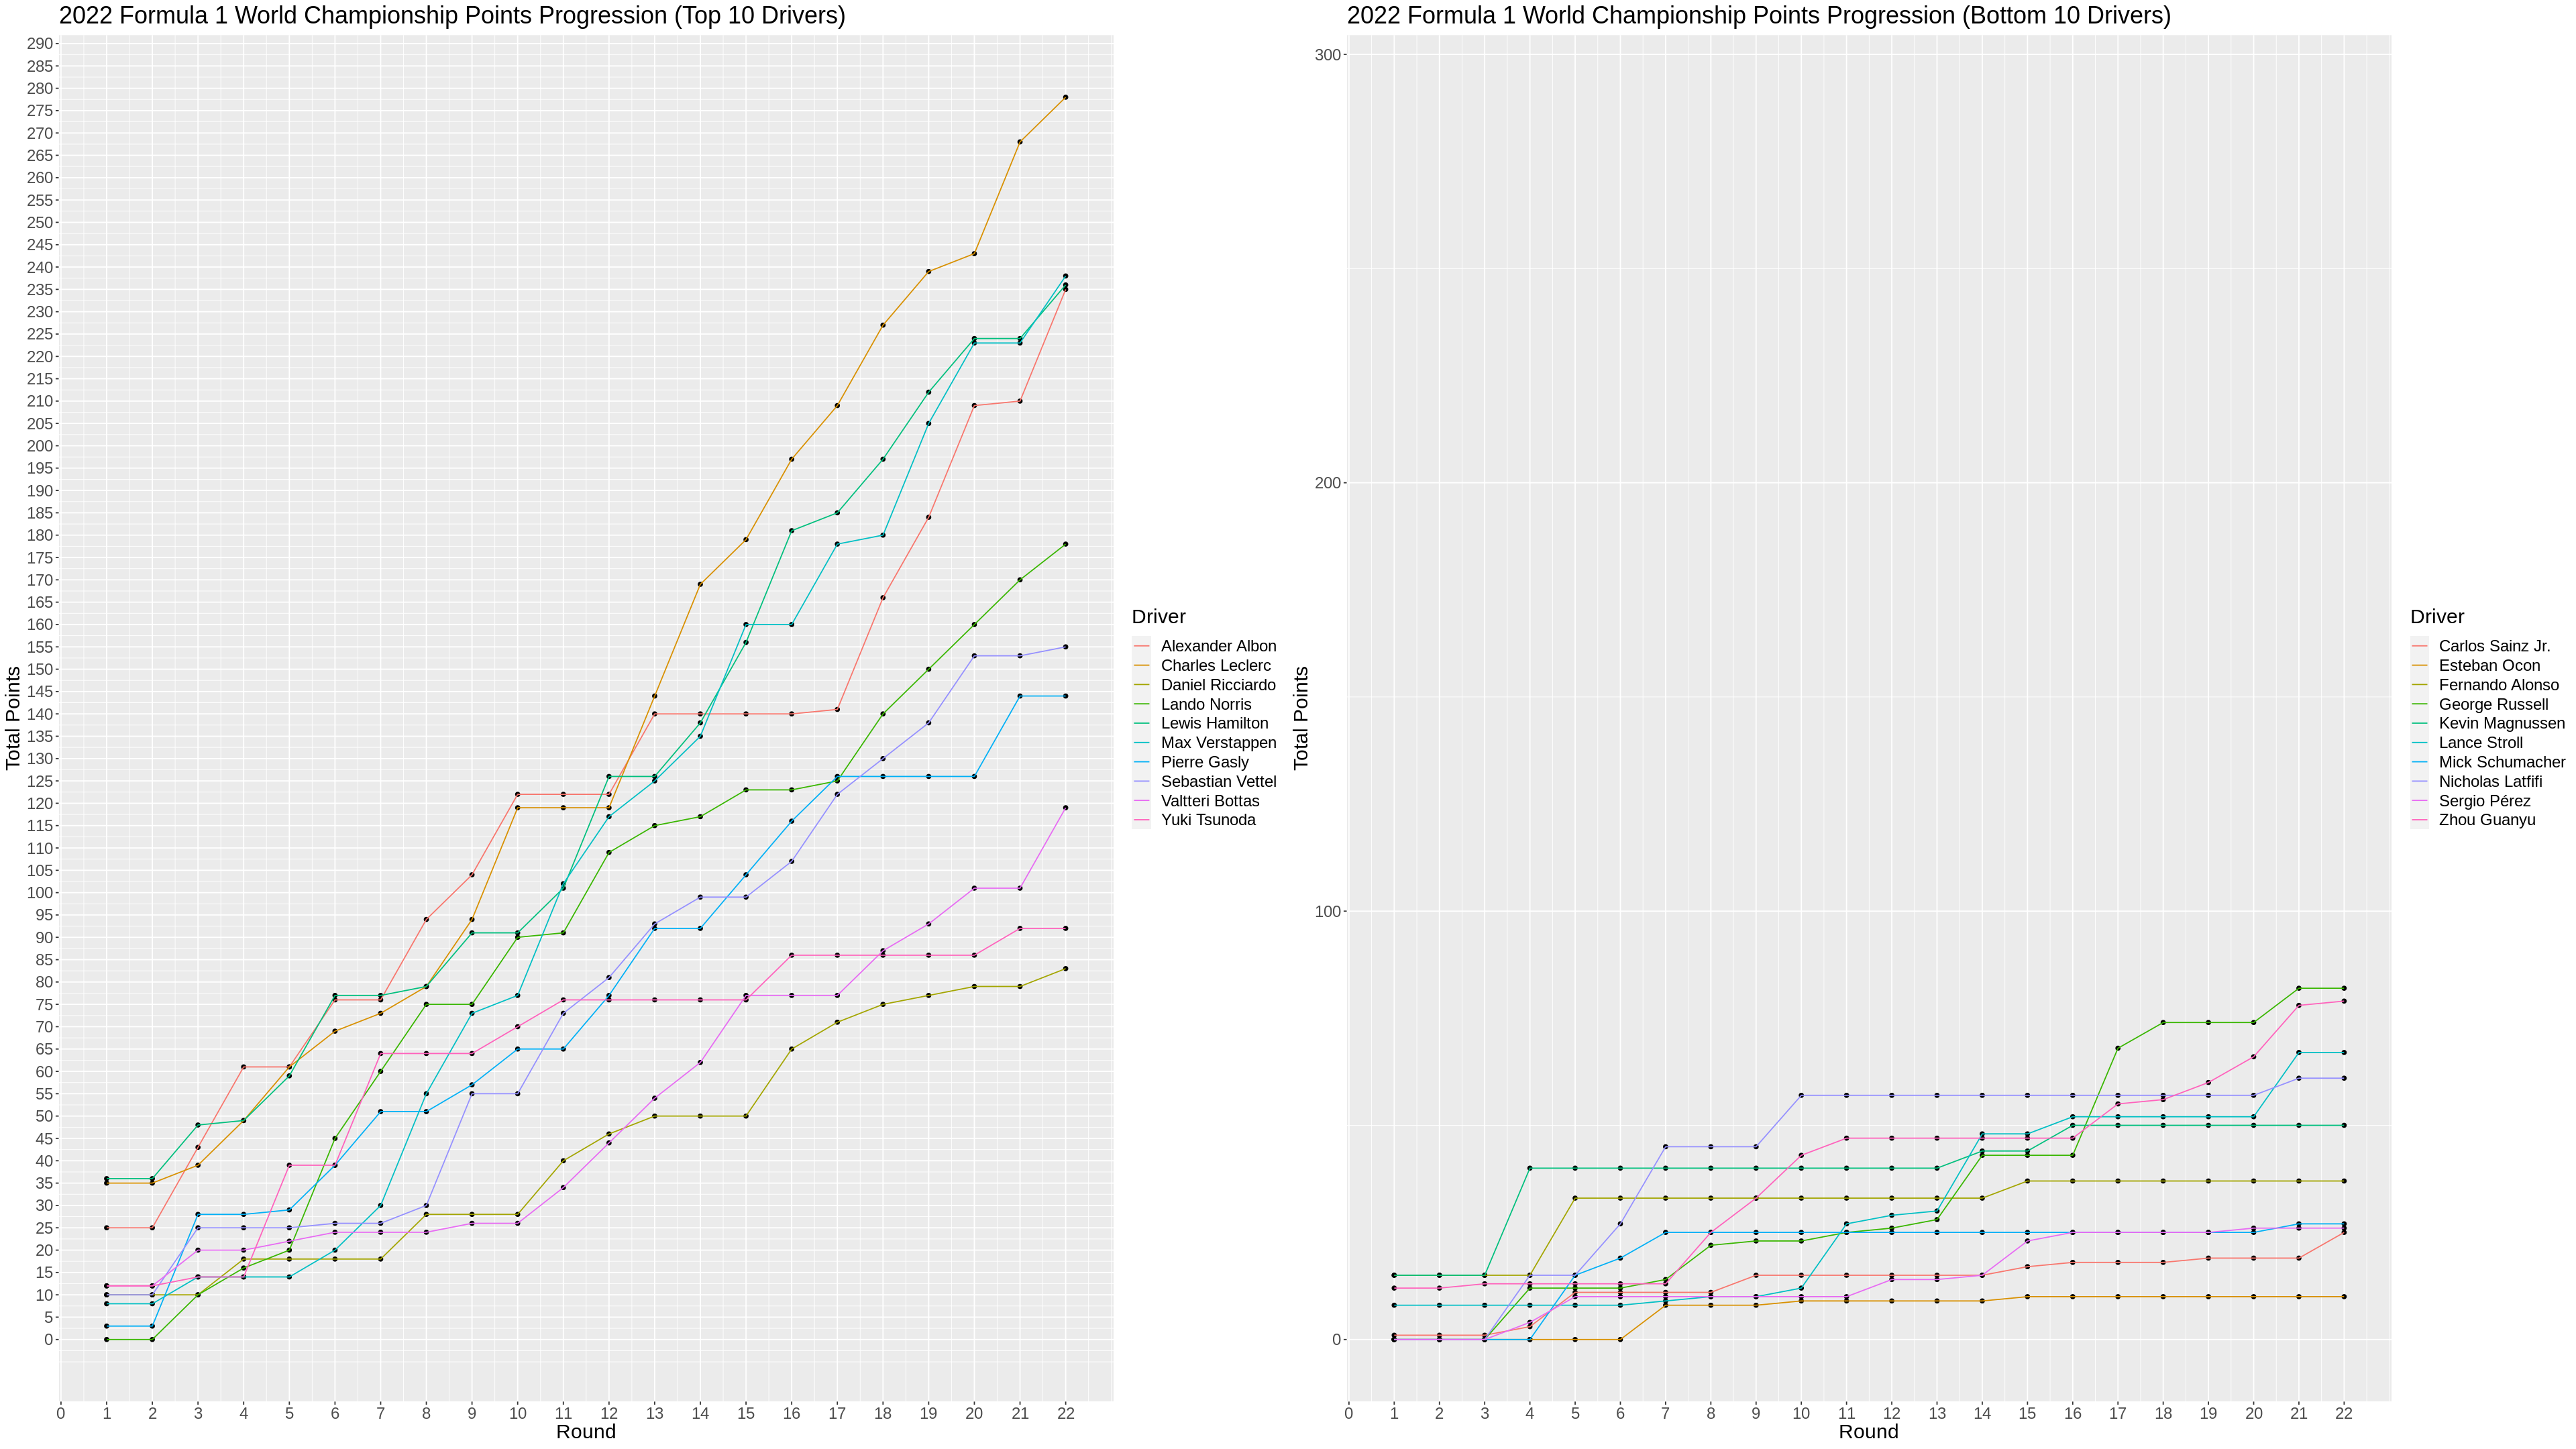

In [47]:
points_data <- read_csv("https://raw.githubusercontent.com/TaylorOglow/Formula_1/main/point_trend.csv")

top_10_drivers <- points_data %>% 
            filter(Round == 22) %>%
            arrange(desc(by = Points_UTR)) %>%
            slice(1:10) %>% 
            pull(Driver)

bottom_10_drivers <- points_data %>% 
            filter(Round == 22) %>%
            arrange(desc(by = Points_UTR)) %>%
            slice(11:20) %>% 
            pull(Driver)


points_top_10 <- points_data %>% filter(Driver %in% top_10_drivers)

points_bottom_10 <- points_data %>% filter(Driver %in% bottom_10_drivers)


options(repr.plot.width = 32, repr.plot.height = 18)


#### TOP 10


driver_champ_top <- ggplot(points_top_10, aes(x = Round, y = Points_UTR)) + 
                geom_point() +
                geom_line(aes(colour = Driver)) + 
                labs(x = "Round", y = "Total Points", color = "Driver") + 
                theme(text = element_text(size = 18)) +
                ggtitle("2022 Formula 1 World Championship Points Progression (Top 10 Drivers)") + 
                scale_x_continuous(breaks = seq(0, 22, 1)) +  
                scale_y_continuous(breaks = seq(0, 300, 5)) + 
                scale_fill_brewer(palette = "Paired") 


driver_champ_bottom <- ggplot(points_bottom_10, aes(x = Round, y = Points_UTR)) + 
                geom_point() +
                geom_line(aes(colour = Driver)) + 
                labs(x = "Round", y = "Total Points", color = "Driver") + 
                theme(text = element_text(size = 18)) + 
                ggtitle("2022 Formula 1 World Championship Points Progression (Bottom 10 Drivers)") + 
                scale_x_continuous(breaks = seq(0, 22, 1)) +  
                scale_y_continuous(breaks = seq(0, 300, 5)) + 
                scale_fill_brewer(palette = "Paired") + 
                ylim(0, 290)


final_standings <- plot_grid(driver_champ_top, driver_champ_bottom)

final_standings

# display.brewer.all(colorblindFriendly = T)

# Discussion

# References